# FINM 250 Midterm
### TA Solutions

## Part 1

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# sys.path.append("../")
from utils import (
    calc_univariate_regression,
    calc_iterative_regression,
    calc_risk_metrics,
    calc_performance_metrics,
    calc_return_metrics,
    calc_mv_portfolio
)

plt.rcParams["axes.grid"] = True
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["font.family"] = "serif"
plt.style.use("ggplot")
pd.set_option("display.float_format", lambda x: "{:.4f}".format(x))

ADJ = 12

from functools import partial

get_data = partial(
    pd.read_excel, "midterm_A_2023_data-1.xlsx", index_col=0, parse_dates=[0]
)

factors = get_data(sheet_name="factors (excess returns)")
commodities = get_data(sheet_name="commodities (excess returns)")
forecasting = get_data(sheet_name="forecasting (weekly)")

### 1

In [2]:
calc_return_metrics(commodities, adj=ADJ, as_df=True).iloc[:, :3]

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio
NG1,0.1440,0.5381,0.2676
KC1,0.0450,0.3209,0.1401
CC1,0.0848,0.3246,0.2612
LB1,0.1309,0.4008,0.3267
CT1,0.0572,0.3071,0.1864
SB1,0.0913,0.3467,0.2635
LC1,0.0296,0.1876,0.1576
W1,0.0761,0.3116,0.2441
S1,0.0713,0.2651,0.2688
C1,0.0861,0.2986,0.2882


### 2

In [3]:
calc_risk_metrics(commodities, var=0.01, as_df=True)

,Skewness,Excess Kurtosis,VaR (0.01),CVaR (0.01),Min,Max,Max Drawdown,Bottom,Peak,Recovery,Duration (days)
NG1,0.6967,1.8652,-0.3590,-0.3875,-0.4216,0.6260,-0.9015,2020-03-31,2005-09-30,-,-
KC1,0.8105,1.7212,-0.1781,-0.2153,-0.2277,0.4361,-0.7044,2019-04-30,2011-04-30,-,-
CC1,0.3587,0.9276,-0.1981,-0.2314,-0.2817,0.3402,-0.5115,2017-04-30,2011-02-28,-,-
LB1,0.8656,3.4574,-0.2393,-0.2952,-0.3404,0.5841,-0.7117,2009-02-28,2021-05-31,2018-04-30 00:00:00,3348
CT1,-0.1276,0.8718,-0.2069,-0.2632,-0.3612,0.2458,-0.7640,2020-03-31,2011-02-28,-,-
SB1,0.5352,1.7727,-0.2015,-0.2632,-0.3126,0.4582,-0.7109,2020-04-30,2011-01-31,-,-
LC1,-0.2655,1.0424,-0.1272,-0.1662,-0.2168,0.1608,-0.4947,2020-04-30,2014-11-30,-,-
W1,0.5616,1.6405,-0.1922,-0.2208,-0.2525,0.4232,-0.6695,2016-08-31,2008-02-29,-,-
S1,-0.5348,1.4115,-0.2141,-0.2539,-0.3297,0.1941,-0.5484,2020-05-31,2012-08-31,-,-
C1,0.1254,0.7089,-0.1961,-0.2287,-0.2654,0.3115,-0.6339,2020-04-30,2012-07-31,-,-


### 3

Relevant metrics are all of the ones we just calculated. That is, mean return, volatility, Sharpe Ratio, as well as all of the risk-metrics such as VaR, CVaR, and maximum drawdown. You are able to get a good idea of the univariate risks of an asset based off of those metrics.

### 4

My answer would not be the same. Although the univariate metrics can still be of use, by far the most important statistic when looking at a large portfolio of assets is its correlation/covariance with the existing assets. That is, adding an asset that is correlated with existing ones does not provide additional diversification or risk/reward; what we are really after is low correlation.

### 5

In [4]:
calc_univariate_regression(commodities['SB1'], commodities['C1'])

IndexingError: Too many indexers

### 6

About 0.13; the beta from our regression. So, for every $100 soybeans we buy we should short $13 of coffee.

## Part 2

### 1, 2

In [5]:
tan_weights = pd.DataFrame(calc_mv_portfolio(commodities.mean(), commodities.cov()), index=commodities.columns, columns=['Tangency Weights'])
tan_weights['Target Weights'] = calc_mv_portfolio(commodities.mean(), commodities.cov(), target=0.0075)
tan_weights

,Tangency Weights,Target Weights
NG1,0.0574,0.0591
KC1,-0.0728,-0.0749
CC1,0.0745,0.0766
LB1,0.0866,0.0891
CT1,-0.0095,-0.0098
SB1,0.0636,0.0654
LC1,0.1289,0.1326
W1,-0.0104,-0.0107
S1,0.0273,0.0281
C1,0.0848,0.0872


### 3

In [97]:
tan_weights['Sharpe'] = calc_performance_metrics(commodities)['Annualized Sharpe Ratio']
tan_weights.sort_values('Sharpe', ascending=False)

,Tangency Weights,Target Weights,Sharpe
GC1,0.6031,0.6085,0.5017
PA1,0.0733,0.0812,0.3678
HG1,0.0746,0.0774,0.3614
SI1,-0.1814,-0.1818,0.3394
LB1,0.0866,0.0940,0.3267
C1,0.0848,0.0897,0.2882
S1,0.0273,0.0245,0.2688
NG1,0.0574,0.0616,0.2676
SB1,0.0636,0.0654,0.2635
CC1,0.0745,0.0764,0.2612


No. The only exception is Gold (GC1), which has the highest sharpe and the highest weight. Most of the others do not have a clear relationship between Sharpe and Tangency.

### 4

In [98]:
tan_returns = commodities @ tan_weights['Tangency Weights']
calc_return_metrics(tan_returns.to_frame('Tangency Returns'), as_df=True).iloc[:, :3].T

,Tangency Returns
Annualized Return,0.0875
Annualized Volatility,0.1163
Annualized Sharpe Ratio,0.7524


### 5

They put individual constraints on a per-asset basis, in line with risk and their mandate as an endowment. So, they might only restrict public equities to be 50% of their portoflio, real-estate to 10%, etc. They solve the issue of extreme weights that the tangency portfolio implies by imposing hard limits on the weights whilst running an MV-optimizer.

### 6

The inverted covariance matrix. Namely, since inverting a matrix requires scaling by 1/det(cov), and since correlations are high the covariance matrix is close to singular. So a small change in one of the values leads to a huge change is 1/det(cov), and thus highly unstable weights.

Another reason: out of sample performance; the weights which maximize Sharpe in-sample as likely different from the ones that maximize out of sample performance.

## Part 3

### 1

In [99]:
regr_res = calc_iterative_regression(commodities, factors, one_to_many=True)
regr_res

,Alpha,R-Squared,MKT Beta,UMD Beta,Information Ratio,Tracking Error
NG1,0.1120,0.0173,0.3541,0.3812,0.2099,0.0444
KC1,0.0232,0.0259,0.3151,-0.0275,0.0733,0.0264
CC1,0.0708,0.0120,0.2073,-0.0358,0.2194,0.0269
LB1,0.0645,0.1368,0.9421,-0.0048,0.1732,0.0310
CT1,0.0249,0.0990,0.5042,-0.1786,0.0855,0.0243
SB1,0.0931,0.0327,0.0580,-0.3192,0.2731,0.0284
LC1,0.0154,0.0200,0.1831,0.0661,0.0830,0.0155
W1,0.0545,0.0213,0.2989,0.0224,0.1769,0.0257
S1,0.0425,0.0529,0.3995,0.0273,0.1649,0.0215
C1,0.0609,0.0282,0.3404,0.0620,0.2068,0.0245


### 2

- $\alpha$ - 0
- Beta - Satisfies the equation $\mathbb{E}[r_i] = \beta_1 \mathbb{E}[r_{mkt}] + \beta_2 \mathbb{E}[r_{umd}] $
- R^2 - Doesn't matter

### 3

Since the CAPM really only cares about the $\alpha$, I am ordering these by that value and taking the lowest one.

In [100]:
regr_res.abs().sort_values('Alpha')

,Alpha,R-Squared,MKT Beta,UMD Beta,Information Ratio,Tracking Error
LC1,0.0154,0.0200,0.1831,0.0661,0.0830,0.0155
KC1,0.0232,0.0259,0.3151,0.0275,0.0733,0.0264
CT1,0.0249,0.0990,0.5042,0.1786,0.0855,0.0243
S1,0.0425,0.0529,0.3995,0.0273,0.1649,0.0215
HG1,0.0478,0.2147,0.6906,0.1388,0.2073,0.0192
W1,0.0545,0.0213,0.2989,0.0224,0.1769,0.0257
C1,0.0609,0.0282,0.3404,0.0620,0.2068,0.0245
LB1,0.0645,0.1368,0.9421,0.0048,0.1732,0.0310
SI1,0.0655,0.0584,0.5118,0.1444,0.2197,0.0249
GC1,0.0705,0.0274,0.1316,0.1487,0.4345,0.0135


### 3

LC1 is fit the best, since it has the lowest $\alpha$.

### 4

In [101]:
(regr_res['MKT Beta'] + regr_res['UMD Beta']).to_frame('Total Beta').sort_values('Total Beta', ascending=False)

,Total Beta
LB1,0.9373
PA1,0.8379
NG1,0.7353
SI1,0.6562
HG1,0.5518
S1,0.4267
C1,0.4024
CT1,0.3257
W1,0.3213
KC1,0.2877


I would say that LB1 has the highest premium as it has the highest sum of $\beta$'s, and therefore by the CAPM must have the premium.

### 5

- R^2: doesn't matter.
- Treynor Ratio: should all be the same for all assets and equal to MKT premium.
- Information Ratio: should be 0 since $\alpha$ is 0.

## Part 4

Note: it is equally valid to shift the 'GLD' column back by one, rather than the Tbill columns forward by 1. Full marks will be awarded regardless of which method you choose if done correctly, but your answers may differ slightly from mine.

### 1

In [102]:
signals = forecasting[['Tbill rate', 'Tbill change']].shift(1).dropna()
signals['GLD'] = forecasting['GLD']

model_forc = sm.OLS(signals['GLD'], sm.add_constant(signals[['Tbill rate', 'Tbill change']])).fit()
print('-'*20)
display(model_forc.params.to_frame('Betas'))
print('-'*20)
print(f'R-squared: {model_forc.rsquared:.4f}')

--------------------


,Betas
const,0.0010
Tbill rate,0.0003
Tbill change,0.0005


--------------------
R-squared: 0.0001


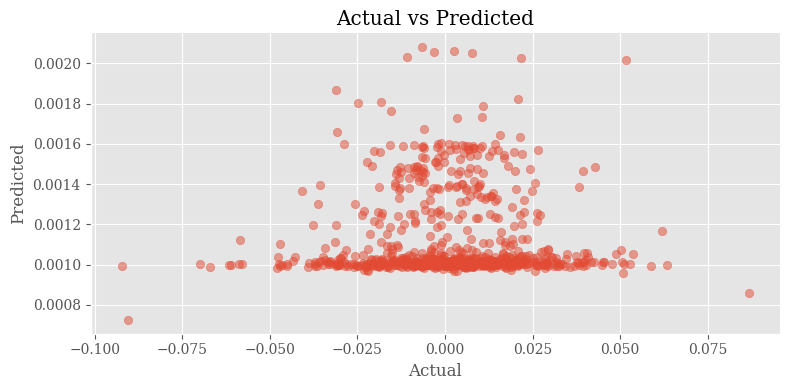

In [103]:
# NOT required but a visual of predicted vs actual.

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(signals['GLD'], model_forc.predict(), alpha=0.5)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted')

fig.tight_layout()

### 2

In [104]:
wts = 0.2 + 0.8 * model_forc.predict(sm.add_constant(signals[['Tbill rate', 'Tbill change']]))
forecast_rets = (forecasting['GLD'] * wts).to_frame('Actual Returns').dropna()
display(forecast_rets.head())
display(forecast_rets.tail())

,Actual Returns
Date,
2009-04-26,0.0106
2009-05-03,-0.0062
2009-05-10,0.0070
2009-05-17,0.0035
2009-05-24,0.0057


,Actual Returns
Date,
2022-11-06,0.0044
2022-11-13,0.0104
2022-11-20,-0.0022
2022-11-27,0.0005
2022-12-04,-0.0006


### 3

,GLD,GLD Trading
Annualized Return,0.0580,0.0118
Annualized Volatility,0.1523,0.0306
Annualized Sharpe Ratio,0.3805,0.3872


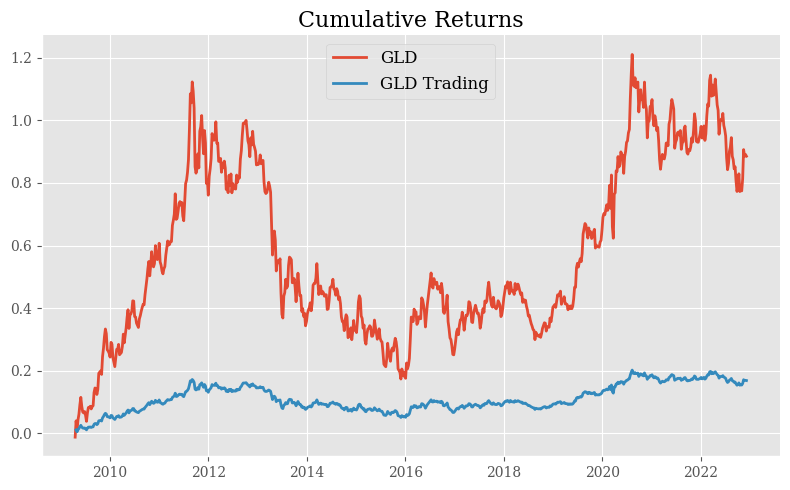

In [105]:
forecasting['GLD Trading'] = forecast_rets['Actual Returns']
display(calc_return_metrics(forecasting[['GLD', 'GLD Trading']], as_df=True, adj=52).iloc[:, :3].T)

fig, ax = plt.subplots(figsize=(8, 5))
cum_rets = (forecasting[['GLD', 'GLD Trading']] + 1).cumprod() - 1
ax.plot(cum_rets, lw=2)
ax.set_title("Cumulative Returns", fontsize=16)
ax.legend(cum_rets.columns, fontsize=12)
fig.tight_layout()

They have about the same Sharpe, so based on mean and volatility we can't really say one is better than the other. Our trading strategy has a much lower mean and lower vol, compared to GLD that has a higher mean and vol. But the ratios of these are basically the same.

### 4

The Tbill rate. Since the change is likely a short-term signal, given that it can only change so much in the long run, I would say that the Tbill rate provides a stronger signal over a long time horizon.